**<h1>Prediction of Default of Credit Card**


**Content**

There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit


SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

## Loading the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Uploading the dataset

In [2]:
df = pd.read_excel("TaiwanCreditDefaults.xls")

In [3]:
df1 = df.copy()
df1.copy()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## Descriptive Statistics

In [4]:
df1.shape

(30000, 25)

In [5]:
df1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
df1.describe(include="all")

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [8]:
df1.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

## Exploratory Data Analysis

### Univariate Analysis

#### > 'default payment next month' [ Default payment (1=yes, 0=no)]

In [9]:
df1["default payment next month"].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [10]:
df1["default payment next month"].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

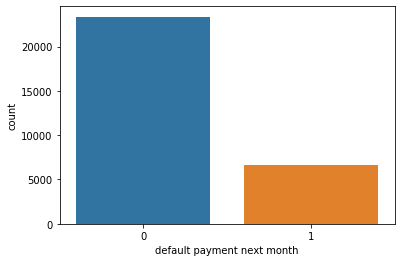

In [11]:
sns.countplot(x = "default payment next month", data = df1)
plt.show()

#### > 'SEX: Gender (1=male, 2=female)'

In [12]:
df1["SEX"].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

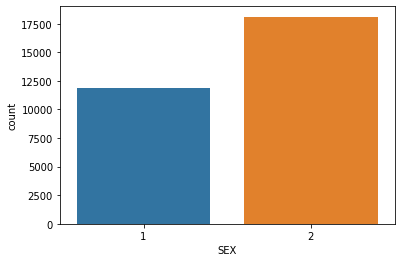

In [13]:
sns.countplot(df1["SEX"])

#### > 'EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)'

In [14]:
df1["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

We replace the 'unknown' with 'others'

In [15]:
df1["EDUCATION"].replace(0,4,inplace=True)
df1["EDUCATION"].replace(5,4,inplace=True)
df1["EDUCATION"].replace(6,4,inplace=True)

In [16]:
df1["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

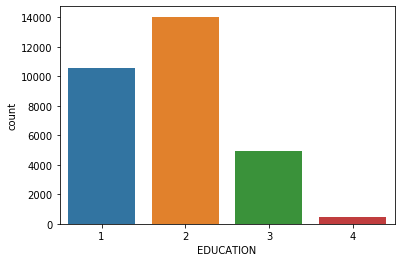

In [17]:
sns.countplot(df1["EDUCATION"])

#### > 'MARRIAGE: Marital status (1=married, 2=single, 3=others)'

In [18]:
df1["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [19]:
df1["MARRIAGE"].replace(0,3,inplace=True)

In [20]:
df1.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

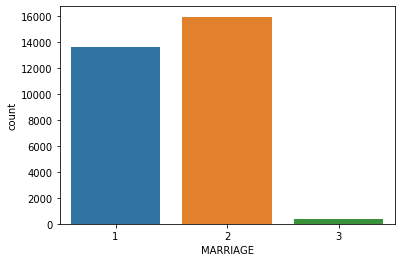

In [21]:
sns.countplot(df1.MARRIAGE)

#### 'AGE: Age in years'

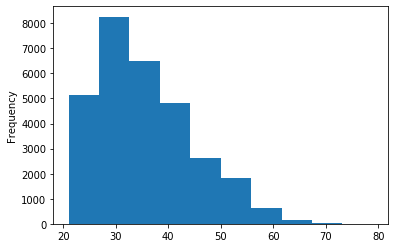

In [22]:
df1["AGE"].plot(kind="hist")
plt.show()

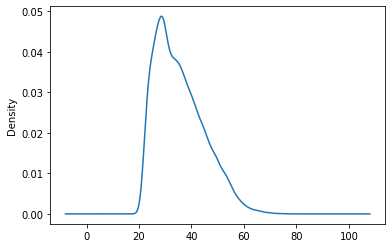

In [23]:
df1.AGE.plot(kind="density")
plt.show()

#### > 'LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)'

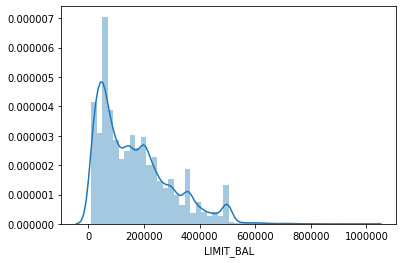

In [24]:
sns.distplot(df1["LIMIT_BAL"])
plt.show()

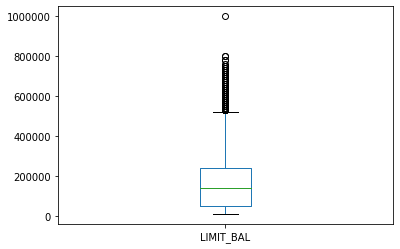

In [25]:
df1["LIMIT_BAL"].plot.box()
plt.show()

WE take the log transformation to make it approximately equal to normal distribution. Also there will be no outliers as a result of log transformation.

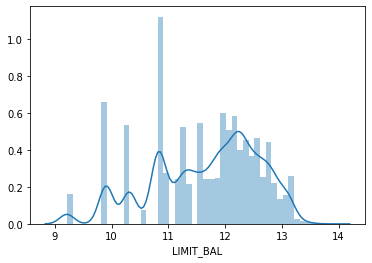

In [26]:
sns.distplot(np.log(df1["LIMIT_BAL"]))
plt.show()

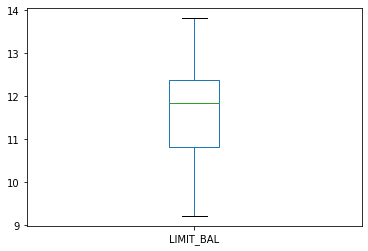

In [27]:
np.log(df1["LIMIT_BAL"]).plot.box()
plt.show()

In [28]:
#We will normalize all the variables in the later part.
#df1["LIMIT_BAL"] = np.log(df1["LIMIT_BAL"])

### Bivariate Analysis

#### 'SEX' and 'default payment next month'

In [29]:
pd.crosstab(df1["SEX"],df1["default payment next month"])

default payment next month,0,1
SEX,,
1,9015,2873
2,14349,3763


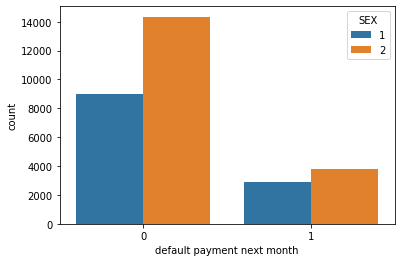

In [30]:
sns.countplot(x = "default payment next month", hue = "SEX", data = df1)
plt.show()

#### 'EDUCATION' and 'default payment next month'

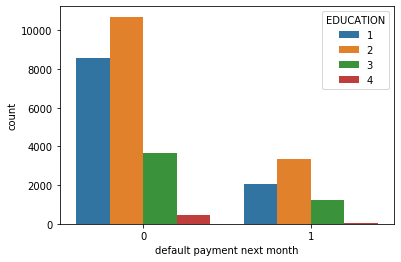

In [31]:
sns.countplot(x = "default payment next month", hue = "EDUCATION", data = df1)
plt.show()

#### 'MARRIAGE' and 'default payment next month'

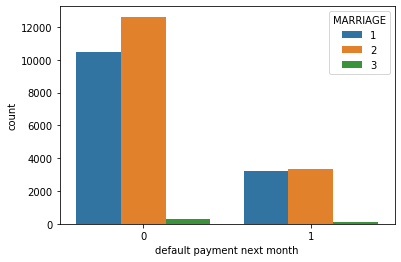

In [32]:
sns.countplot(x = "default payment next month", hue = "MARRIAGE", data = df1)
plt.show()

#### 'AGE' and 'LIMIT_BAL'

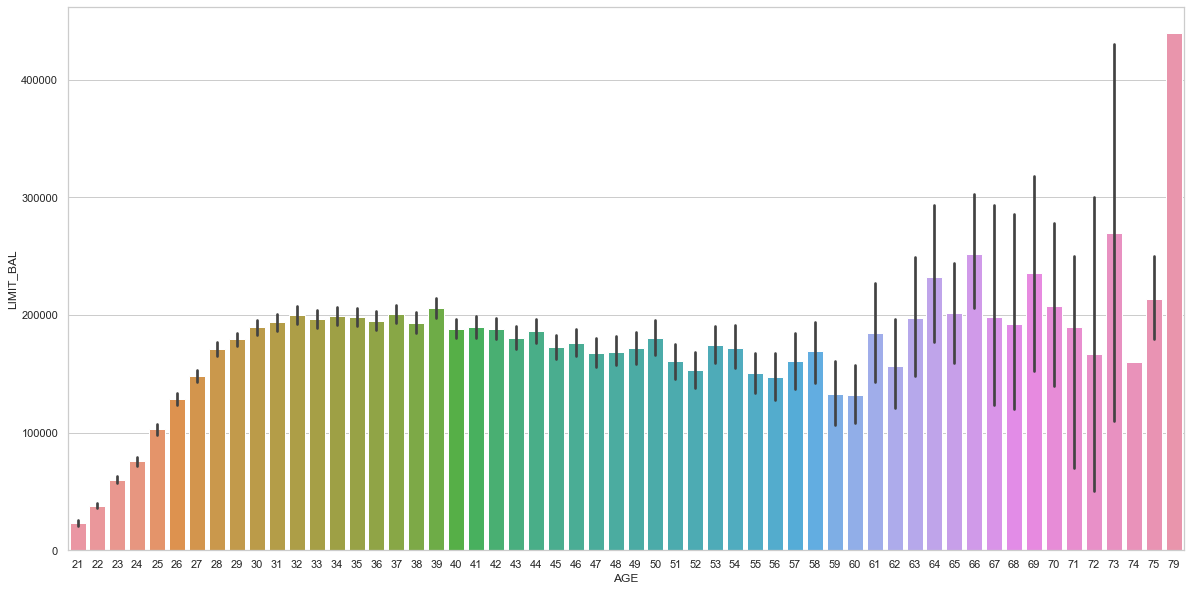

In [33]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
sns.barplot(df1.AGE,df1["LIMIT_BAL"])
plt.show()

## Correlation Matrix

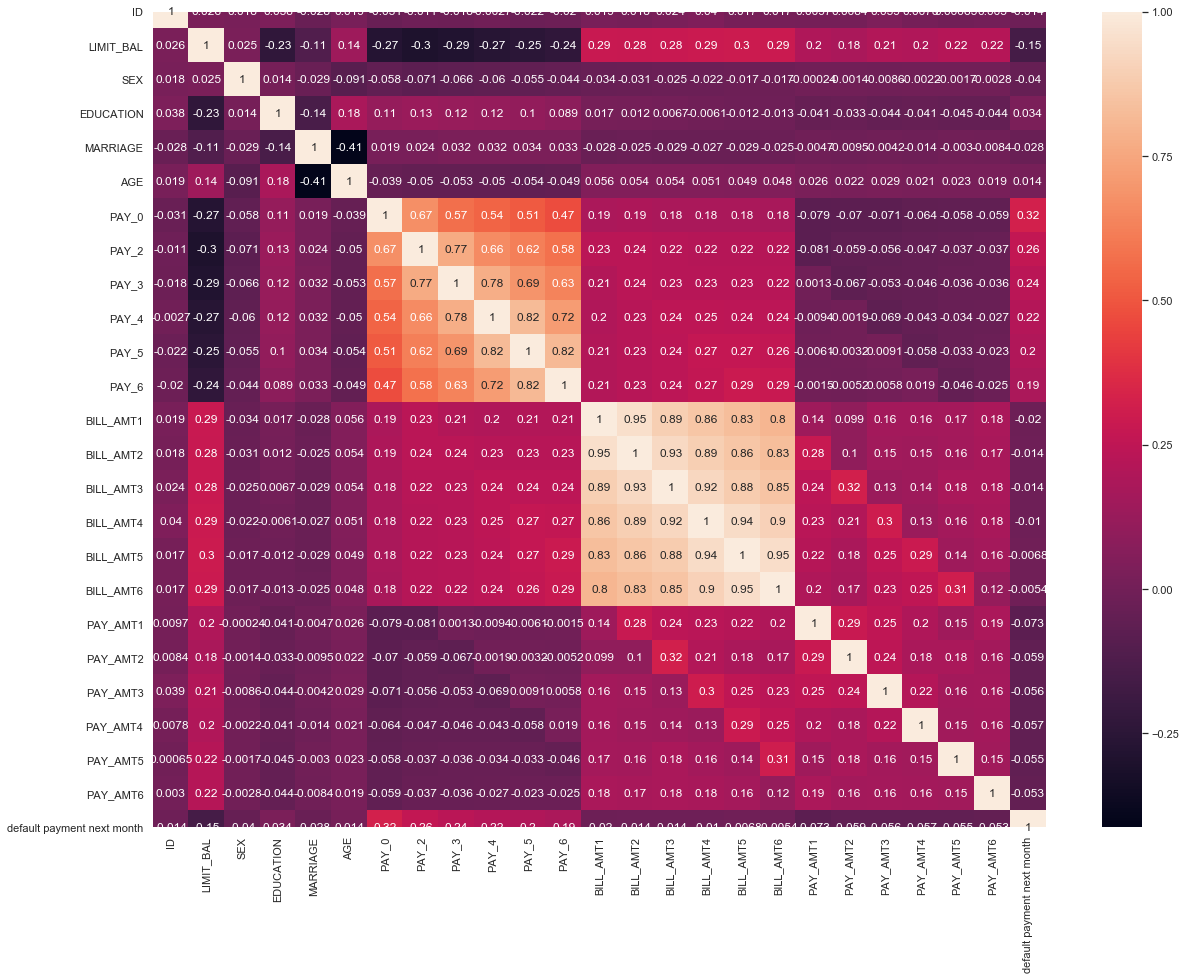

In [34]:
corr = df1.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,annot=True)
plt.show()

## Correlation of Dependent variable with all the independent variables.

In [35]:
X = df1.drop(["default payment next month"],axis = 1)
y = df1["default payment next month"]

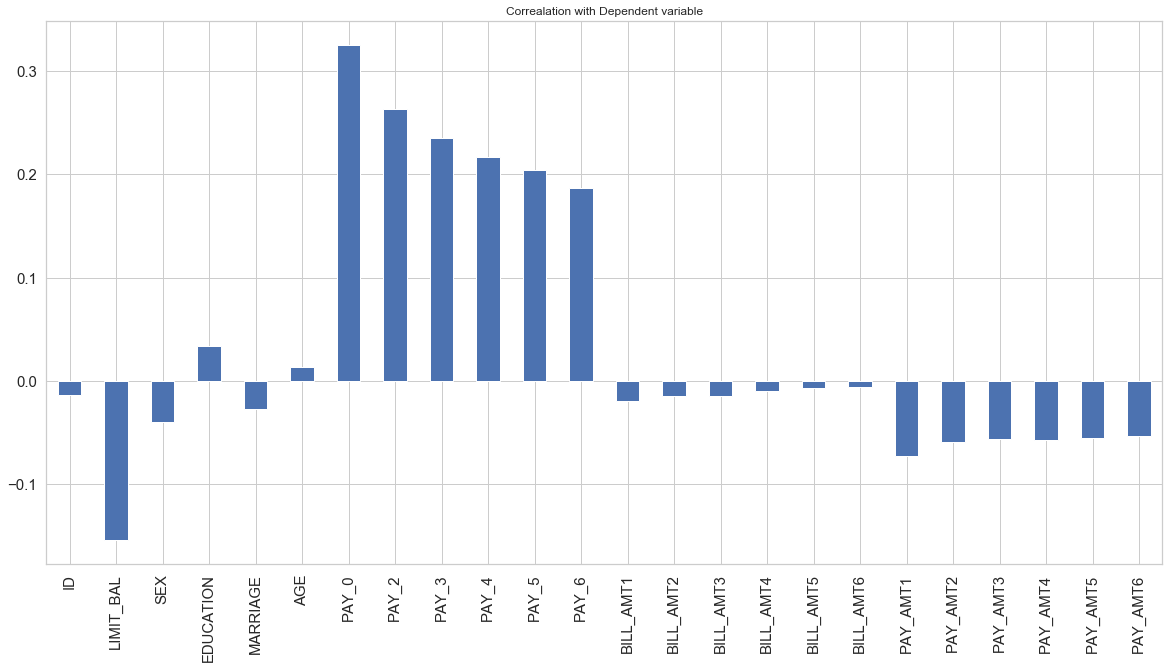

In [36]:
X.corrwith(y).plot.bar(figsize=(20,10),title="Correalation with Dependent variable",fontsize=15,grid=True)

We drop the variables with very less correlation.

In [37]:
X = X.drop(["ID","MARRIAGE","AGE","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"],axis=1)

### Scaling the data

In [38]:
# We use 'Normalization' technique.

from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)

### Train-Test Split

In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(class_weight="balanced")
lr1.fit(X_train,y_train)

C:\Users\Dharmil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
print('classes: ',lr1.classes_)
print('coefficients: ',lr1.coef_)
print('intercept :',lr1.intercept_)

classes:  [0 1]
coefficients:  [[-1.07282533 -0.12189571 -0.12766661  4.92223541  0.87040392  0.76572092
   0.09765085  0.10792135 -0.14277873 -4.73847368 -3.04680229 -2.30526522
  -2.76349977 -1.63557677 -1.31303745]]
intercept : [-1.07768052]


In [49]:
pred1 = lr1.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
print("Logistic Regression Accuracy: ",accuracy_score(pred1,y_test))

Logistic Regression Accuracy:  0.6826666666666666


In [51]:
con_mat1 = confusion_matrix(y_test,pred1)
print("Logistic Regression Confusion Matrix: ")
print(con_mat1)

Logistic Regression Confusion Matrix: 
[[3241 1442]
 [ 462  855]]


In [52]:
report1 = classification_report(y_test,pred1)
print("Logistic Regression Classification Report: ")
print(report1)

Logistic Regression Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.69      0.77      4683
           1       0.37      0.65      0.47      1317

    accuracy                           0.68      6000
   macro avg       0.62      0.67      0.62      6000
weighted avg       0.76      0.68      0.71      6000



In [53]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

Logistic Regression AUC-ROC Curve: 


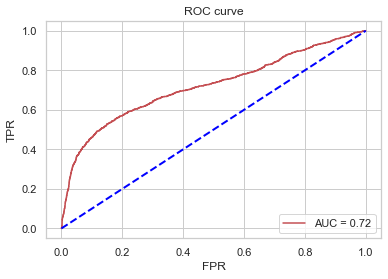

In [54]:
prob1 = lr1.predict_proba(X_test)
preds = prob1[:,1]

fpr,tpr,threshold = roc_curve(y_test,preds,drop_intermediate=False)
roc_auc = auc(fpr,tpr)
plt.figure()
##Adding the ROC
print("Logistic Regression AUC-ROC Curve: ")
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## Support Vector Machine (SVM)

In [80]:
from sklearn.svm import SVC

svm1 = SVC(kernel="linear",random_state=10,class_weight="balanced")
svm1.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=10,
    shrinking=True, tol=0.001, verbose=False)

In [81]:
pred2 = svm1.predict(X_test)

In [82]:
print("Support Vector Machine Accuracy: ",accuracy_score(y_test,pred2))

Support Vector Machine Accuracy:  0.7765


In [83]:
from sklearn.metrics import confusion_matrix
con_mat2 = confusion_matrix(y_test,pred2)
print("Support Vector Machine Confusion MatriX: ")
print(con_mat2)

Support Vector Machine Confusion MatriX: 
[[3966  717]
 [ 624  693]]


In [84]:
report2 = classification_report(y_test,pred2)
print("Support Vector Machine Report: ")
print(report2)

Support Vector Machine Report: 
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4683
           1       0.49      0.53      0.51      1317

    accuracy                           0.78      6000
   macro avg       0.68      0.69      0.68      6000
weighted avg       0.78      0.78      0.78      6000



## Support Vector Machine with GridSearchCV

In [75]:
"""
from sklearn.model_selection import GridSearchCV

parameters = [
             {"C":[1,10,100,1000],"kernel":["linear"]},
             {"C":[1,10,100,1000],"kernel":["rbf"],"gamma":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
             ]

grid_search1 = GridSearchCV(estimator = svm1,
                            param_grid = parameters,
                            scoring = "accuracy",
                            cv = 10,
                            n_jobs = -1)

grid_search2 = grid_search1.fit(X_train,y_train)
"""

C:\Users\Dharmil\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [78]:
grid_search2.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [85]:
svm2= SVC(C = 1,kernel = 'rbf', gamma=0.1,class_weight="balanced")
svm2.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [86]:
pred3 = svm2.predict(X_test)

In [88]:
print("Support Vector Machine with GridSearchCV Accuracy: ",accuracy_score(y_test,pred3))

Support Vector Machine with GridSearchCV Accuracy:  0.7841666666666667


In [89]:
print("Support Vector Machine with GridSearchCV Confusion Matrix: ")
print(confusion_matrix(y_test,pred3))

Support Vector Machine with GridSearchCV Confusion Matrix: 
[[4023  660]
 [ 635  682]]


In [90]:
print("Support Vector Machine with GridSearchCV Classification Report: ")
print(classification_report(y_test,pred3))

Support Vector Machine with GridSearchCV Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4683
           1       0.51      0.52      0.51      1317

    accuracy                           0.78      6000
   macro avg       0.69      0.69      0.69      6000
weighted avg       0.79      0.78      0.78      6000



## DECISION TREES

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt1 = DecisionTreeClassifier(class_weight="balanced",random_state=10)
dt1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [57]:
dtpred1 = dt1.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Decision Tree Accuracy: ",accuracy_score(y_test,dtpred1))

Decision Tree Accuracy:  0.739


### Tuning 'max_depth'

In [59]:
train_accuracy=[]
test_accuracy=[]

for depth in range(1,11):
    dt2 = DecisionTreeClassifier(max_depth=depth,class_weight="balanced",random_state=10)
    dt2.fit(X_train,y_train)
    train_accuracy.append(dt2.score(X_train,y_train))
    test_accuracy.append(dt2.score(X_test,y_test))

In [60]:
frame = pd.DataFrame({"max_depth":range(1,11),"Train-Accuracy":train_accuracy,"Test-Accuracy":test_accuracy})
frame

,max_depth,Train-Accuracy,Test-Accuracy
0,1,0.779208,0.783833
1,2,0.779208,0.783833
2,3,0.750792,0.757500
3,4,0.770042,0.777333
4,5,0.778083,0.783833
5,6,0.774875,0.775833
6,7,0.793500,0.784500
7,8,0.765208,0.747000
8,9,0.774792,0.750333
9,10,0.772500,0.734167


No handles with labels found to put in legend.


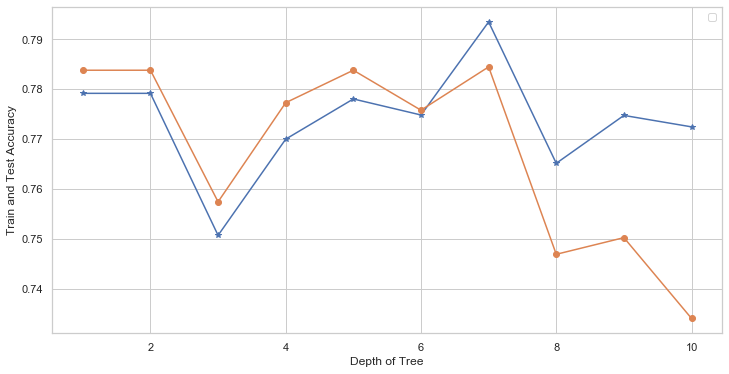

In [61]:
plt.figure(figsize=(12,6))
plt.plot(frame["max_depth"],frame["Train-Accuracy"],marker="*")
plt.plot(frame["max_depth"],frame["Test-Accuracy"],marker="o")
plt.xlabel("Depth of Tree")
plt.ylabel("Train and Test Accuracy")
plt.legend()
plt.show()

Since the Train and Test Accuracy is highest at depth '7', we select it as our maximum depth.

In [62]:
dt2 = DecisionTreeClassifier(max_depth=7,class_weight="balanced",random_state=10)
dt2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [63]:
dtpred2 = dt2.predict(X_test)

In [64]:
print("Decision Tree with depth 7 Accuracy: ",accuracy_score(y_test,dtpred2))

Decision Tree with depth 7 Accuracy:  0.7845


In [65]:
print("Decision Tree Confusion Matrix: ")
print(confusion_matrix(y_test,dtpred2))

Decision Tree Confusion Matrix: 
[[3982  701]
 [ 592  725]]


In [66]:
print("Decision Tree Classification Report: ")
print(classification_report(y_test,dtpred2))

Decision Tree Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4683
           1       0.51      0.55      0.53      1317

    accuracy                           0.78      6000
   macro avg       0.69      0.70      0.69      6000
weighted avg       0.79      0.78      0.79      6000



## Random Forests

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf1 = RandomForestClassifier(class_weight="balanced",random_state=10)
rf1.fit(X_train,y_train)

C:\Users\Dharmil\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=10, verbose=0, warm_start=False)

In [69]:
rfpred1 = rf1.predict(X_test)

In [70]:
print("Random Forest Accuracy: ",accuracy_score(y_test,rfpred1) )

Random Forest Accuracy:  0.807


In [71]:
print("Random Forest Confusion Matrix: ")
print(confusion_matrix(y_test,rfpred1))

Random Forest Confusion Matrix: 
[[4408  275]
 [ 883  434]]


In [80]:
print("Random FOrest Classification Report: ")
print(classification_report(y_test,rfpred1))

Random FOrest Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4683
           1       0.61      0.33      0.43      1317

    accuracy                           0.81      6000
   macro avg       0.72      0.64      0.66      6000
weighted avg       0.78      0.81      0.78      6000



## AdaBoost Classifier

In [73]:
from sklearn.ensemble import AdaBoostClassifier

In [74]:
ab1 = AdaBoostClassifier(base_estimator = rf1,n_estimators=100,learning_rate=0.01)
ab1.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=10,
                   

In [75]:
adpred1 = ab1.predict(X_test)

In [76]:
print("Adaboost Classifier Accuracy: ",accuracy_score(y_test,adpred1))

0.8148333333333333

In [78]:
print("Adaboost Classifier Confusion Matrix: ")
print(confusion_matrix(y_test,adpred1))

Adaboost Classifier Confusion Matrix: 
[[4394  289]
 [ 822  495]]


In [79]:
print("Adaboost Classifier Classification Report: ")
print(classification_report(y_test,adpred1))

Adaboost Classifier Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4683
           1       0.63      0.38      0.47      1317

    accuracy                           0.81      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.81      0.80      6000



In [87]:
import pandas as pd
data = [["Logistic Regression",0.68,462,0.65,0.47],["Support Vector Machine",0.77,624,0.53,0.51],["Support Vector Machine with GridSearchCV",0.78,635,0.52,0.51],["Decision Tree (Max_depth=7)",0.78,592,0.55,0.53],["Random Forests",0.80,883,0.33,0.43],["AdaBoost Classifier",0.81,822,0.38,0.47]]
FN1 = pd.DataFrame(data,columns=["Classification Models","Accuracy","False Negative Score","Recall","F1-Score"])
FN1

,Classification Models,Accuracy,False Negative Score,Recall,F1-Score
0,Logistic Regression,0.68,462,0.65,0.47
1,Support Vector Machine,0.77,624,0.53,0.51
2,Support Vector Machine with GridSearchCV,0.78,635,0.52,0.51
3,Decision Tree (Max_depth=7),0.78,592,0.55,0.53
4,Random Forests,0.80,883,0.33,0.43
5,AdaBoost Classifier,0.81,822,0.38,0.47
